## K-means Clustering

Link: https://www.youtube.com/watch?v=BaZWcSq3IuI

The k-means algorithm is a clustering algorithm that partitions data points into k clusters based on their distances to the nearest mean. The algorithm is simple and efficient, but also has some limitations.

The algorithm works as follows:

- Initialize k cluster centroids randomly
- Assign each data point to the nearest centroid
- Update the centroid of each cluster to be the mean of all data points assigned to that cluster
- Repeat steps 2-3 until the centroids no longer change or a maximum number of iterations is reached.




.

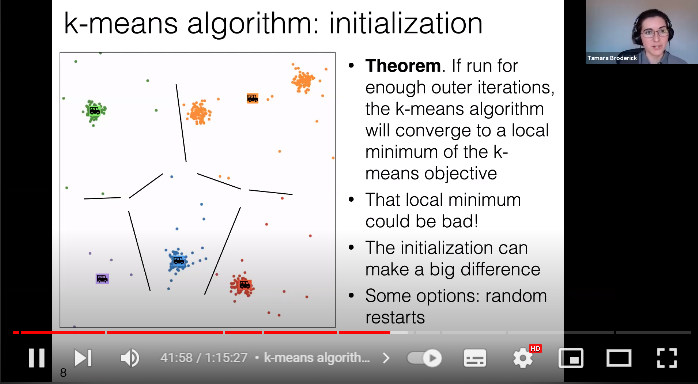

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('gene_expression.xlsx')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


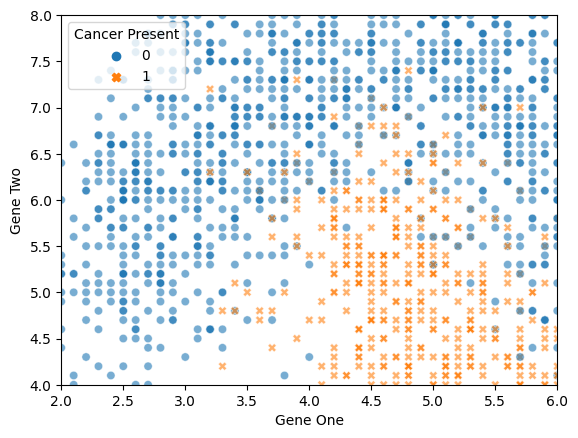

In [4]:
sns.scatterplot(data=df,x="Gene One",y='Gene Two', hue='Cancer Present',alpha=0.6,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)
plt.show()

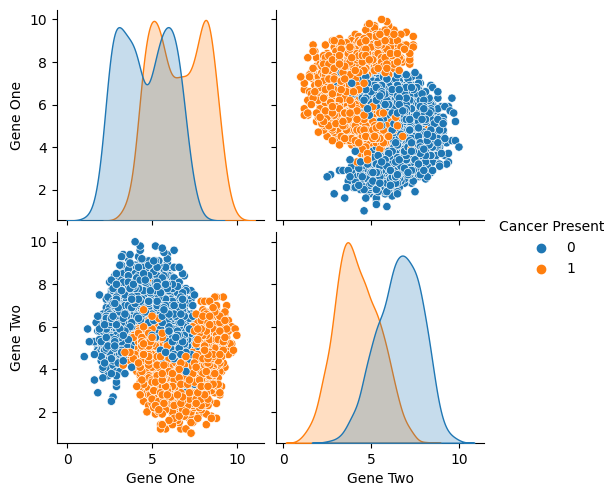

In [6]:
sns.pairplot(data=df,hue='Cancer Present')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X=df.drop('Cancer Present',axis=1)

In [9]:
y=df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
scaler=StandardScaler()

In [12]:
scaled_X_train=scaler.fit_transform(X_train)

In [13]:
scaled_X_test=scaler.fit_transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [16]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_prediction=knn_model.predict(scaled_X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
confusion_matrix(y_test,y_prediction)

array([[463,  47],
       [ 49, 431]])

In [21]:
len(y_test)

990

In [22]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       510
           1       0.90      0.90      0.90       480

    accuracy                           0.90       990
   macro avg       0.90      0.90      0.90       990
weighted avg       0.90      0.90      0.90       990

